# Problem Statement

- To predict the Median value of owner-occupied homes in $1000's when the test values of certain independent variables are given

# Understanding the data set

- the provided data-set describes the housingprice and how the locality of Boston.

- Description of the columns

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
#reading  data
boston_data=pd.read_csv('1.Team1_Boston_HousePrice Dataset.csv')
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [354]:
#drop rows with misssing values
boston_data=boston_data.dropna()
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# There are no missing values in this dataset

In [412]:
#Data set analysis using Numpy
boston_data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data set analysis using Matplotlib

In [356]:
#read the column names
boston_data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [357]:
boston_data.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626



- Using correletion function we were able to view the correletion of each table

- For this data set the dependent variable here is medv or  Median value of owner-occupied homes in $1000's

- To find the independent variable on which medv is dependent on we use correletion function

- Postive corrletion shows that medv is dependent on those variables and negative variables do not.

Text(0, 0.5, 'Dependent varial(medv)')

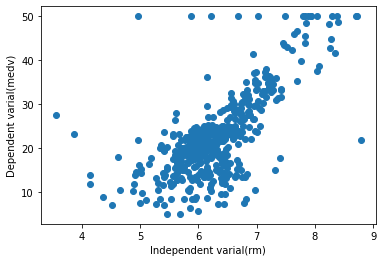

In [358]:
plt.scatter(boston_data.rm,boston_data.medv)
plt.xlabel("Independent varial(rm)")
plt.ylabel("Dependent varial(medv)")

Text(0, 0.5, 'Dependent varial(medv)')

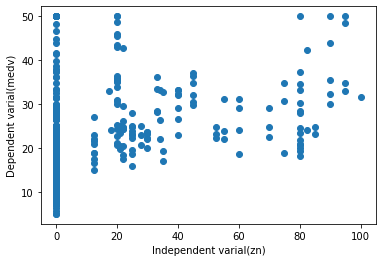

In [359]:
plt.scatter(boston_data.zn,boston_data.medv)
plt.xlabel("Independent varial(zn)")
plt.ylabel("Dependent varial(medv)")

Text(0, 0.5, 'Dependent varial(medv)')

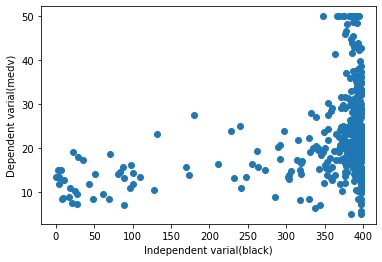

In [360]:
plt.scatter(boston_data.black,boston_data.medv)
plt.xlabel("Independent varial(black)")
plt.ylabel("Dependent varial(medv)")

Text(0, 0.5, 'Dependent varial(medv)')

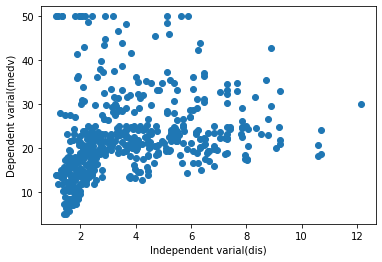

In [361]:
plt.scatter(boston_data.dis,boston_data.medv)
plt.xlabel("Independent varial(dis)")
plt.ylabel("Dependent varial(medv)")

# Inference from the above plots

- medv vs rm has 0.69 correlation with medv,so medv is most depended on rm,it incresed in a linear form
- medv vs zn ,as the plot shows a straight lines which means at a given instant it increases.
- medv vs black ,at first there is no growth at a certain point there is an exponential growth with continues
- medv vs dis increases gradually but this has a low correleation value.

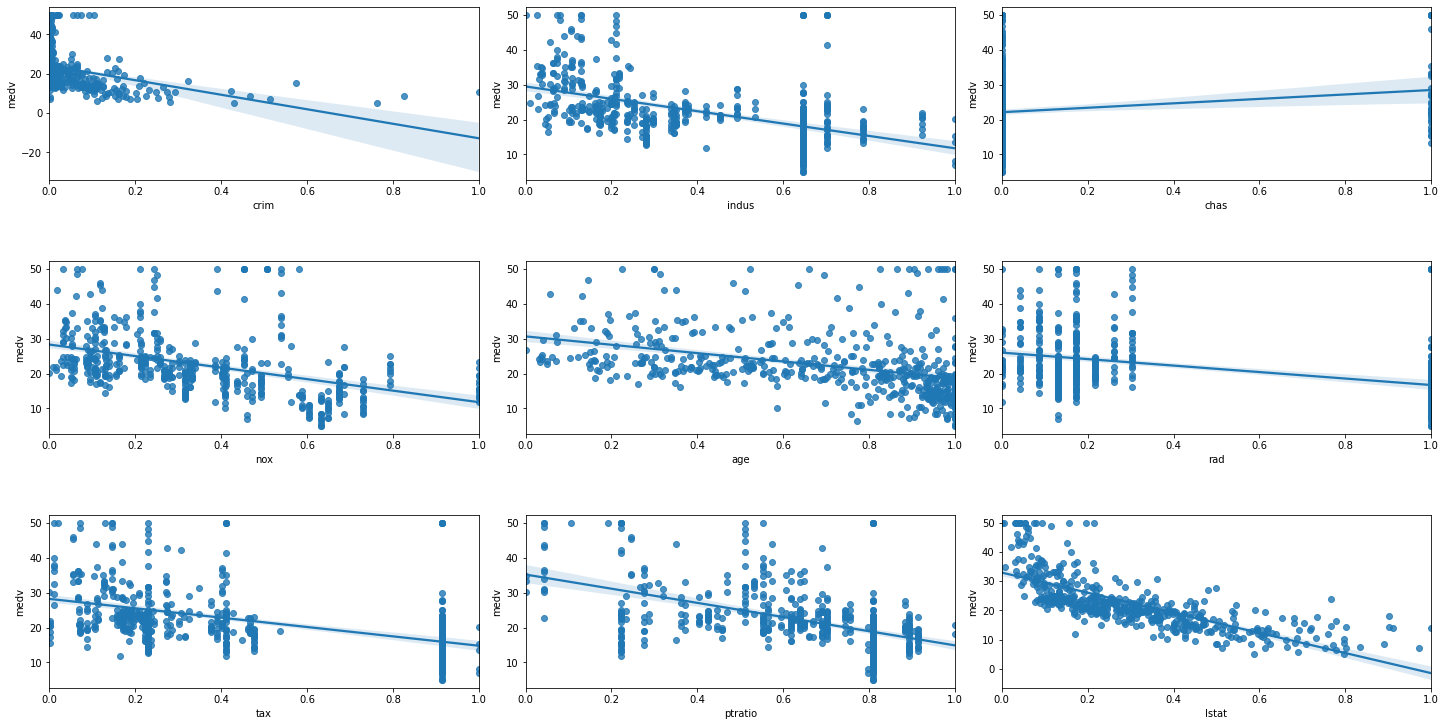

In [362]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['crim', 'indus', 'chas', 'nox', 'age','rad', 'tax','ptratio', 'lstat']
x = boston_data.loc[:,column_sels]
y = boston_data['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Inference from the above six plots
- Each plot are in a negative growth that is the dependent variable is lesser when the independent variable is higher
- The variables with negative graph are not good for accuracy

# For training the datasets we use the variables from the graph with positive deviation

# Using Sklearn we can train the data to predict the median value

In [387]:
# importing train_test_split to import the datasets to train the data and test/predict the trained data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [388]:
# assigning a variable to he independent and dependent columns 
X = boston_data[['rm', 'zn', 'black','dis']]
y = boston_data['medv']

In [389]:
X.head()

,rm,zn,black,dis
0,6.575,18.0,396.90,4.0900
1,6.421,0.0,396.90,4.9671
2,7.185,0.0,392.83,4.9671
3,6.998,0.0,394.63,6.0622
4,7.147,0.0,396.90,6.0622


In [390]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [391]:
print(X_train.shape)
print(X_test.shape)

(404, 4)
(102, 4)


# SVR

In [392]:
svc=svm.SVR(kernel='linear')
svc.fit(X_train, y_train)

SVR(kernel='linear')

In [393]:
#using predict function to predict the outcomeof x_test
X_predict=svc.predict(X_test)
X_predict

array([10.35053244, 19.73146614, 23.78485651, 21.17766864, 20.1337748 ,
       26.96238822, 25.54619819, 20.31890906, 25.32480436, 18.36553112,
       18.70738582, 10.19996008, 19.13826089, 24.19645986, 29.01662693,
       22.20417542, 18.90324403, 28.51674787, 25.86353406, 35.41252514,
       20.59142702,  8.26889073, 19.89425908, 29.96007704, 19.5879836 ,
        8.07502392, 35.64089374,  8.94344001,  5.14445102, 14.69581879,
       19.38345454, 12.60060665, 25.80671148, 23.82917305, 21.34695941,
       35.25378595, 21.09300947, 17.79783275, 28.61351455, 16.63555361,
       12.16286674, 23.93122311, 32.0076366 , 23.64571519, 39.87184265,
       19.83111408, 17.37637785, 21.15941872, 27.58492509, 39.1934347 ,
       21.89919226, 19.28747006, 40.2373775 , 21.29234482, 17.237928  ,
       17.87566408, 13.88466161, 31.16855111, 20.62469847, 24.76531637,
       40.14140319, 22.44159152, 29.42949887, 22.93594908, 23.5626782 ,
       30.03678422,  8.06826593, 23.45218306, 24.57780053, 13.19

In [402]:
#Accuracy for Logistics Regression
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, X_predict)

0.6939238081367483

# Linear Regression ML Model

In [395]:
from sklearn.linear_model import LinearRegression
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [396]:
lm = LinearRegression()

In [397]:
X = boston_data[['rm', 'zn', 'black','dis']]
y = boston_data['medv']

In [398]:
lm.fit(X,y)


LinearRegression()

In [403]:
predicted_details = lm.predict(X_test)
predicted_details

array([11.59544868, 20.0199605 , 23.64558129, 21.30067741, 20.10012228,
       27.22327121, 25.65439491, 20.13226084, 25.92666939, 17.83948038,
       18.69397899, 12.43198433, 19.04971126, 24.69866088, 29.85964265,
       22.46964405, 19.4690322 , 29.62359112, 26.84145032, 35.47323436,
       20.68292263, 10.62091111, 20.0264686 , 29.32458888, 19.88827313,
       10.60193347, 35.36943513, 11.17994346,  7.75483799, 15.88505253,
       20.01906277, 14.69142292, 25.7985534 , 23.63613176, 21.80801491,
       35.14777927, 21.53992589, 18.08327529, 28.85133251, 17.23844709,
       13.04819649, 24.9770725 , 33.49343448, 23.87037405, 41.33636465,
       19.83005901, 18.37161826, 22.01333431, 28.78613617, 38.96134695,
       22.34684656, 19.12049742, 40.11173843, 22.11379208, 17.27814821,
       18.37659608, 16.05688856, 31.87930219, 20.49689983, 24.95330426,
       39.13900406, 22.32881258, 29.37783491, 23.12896317, 23.41862524,
       30.12359502, 10.50995096, 24.30471304, 24.83119379, 15.19

In [404]:
#Accuracy for Linear Regression
explained_variance_score(y_test, predicted_details)

0.6898865652817896

# By comparing the LinearRegression ML model and SVR ML model ,it shows that SVR has higher accuracy of prediction than LinearRegression

# Conclusion
- Using many plots and ML model we have predicted the Median value of owner-occupied homes in $1000's 